# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score
from sklearn.ensemble import BaggingClassifier

# Loading and Understanding Dataset

In [2]:
df = pd.read_csv(r'C:\Users\UBL-HO.DESKTOP-7ET3E40\Desktop\BAI-5A\ML\FetalHealthDiagnosis\fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Preprocessing Data

In [5]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
df.duplicated().sum()

13

In [7]:
df = df.drop_duplicates()
df.shape

(2113, 22)

# EDA

In [8]:
df['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

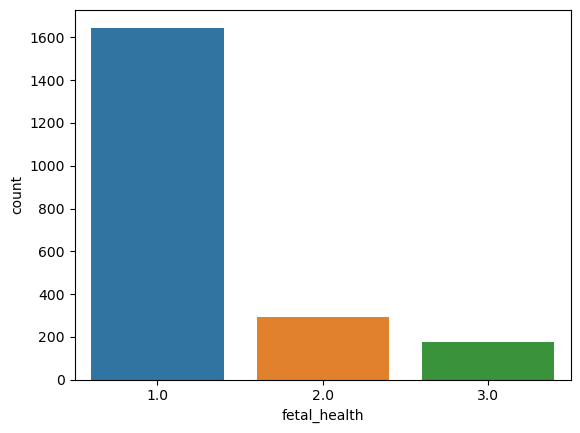

In [9]:
sns.countplot(x='fetal_health', data=df)

In [10]:
y = df.pop('fetal_health')

In [11]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state = 42)
xdata, ydata = smk.fit_resample(df,y)
print(xdata.shape, ydata.shape)

(4924, 21) (4924,)


In [12]:
ydata.value_counts()

3.0    1644
2.0    1640
1.0    1640
Name: fetal_health, dtype: int64

<Axes: >

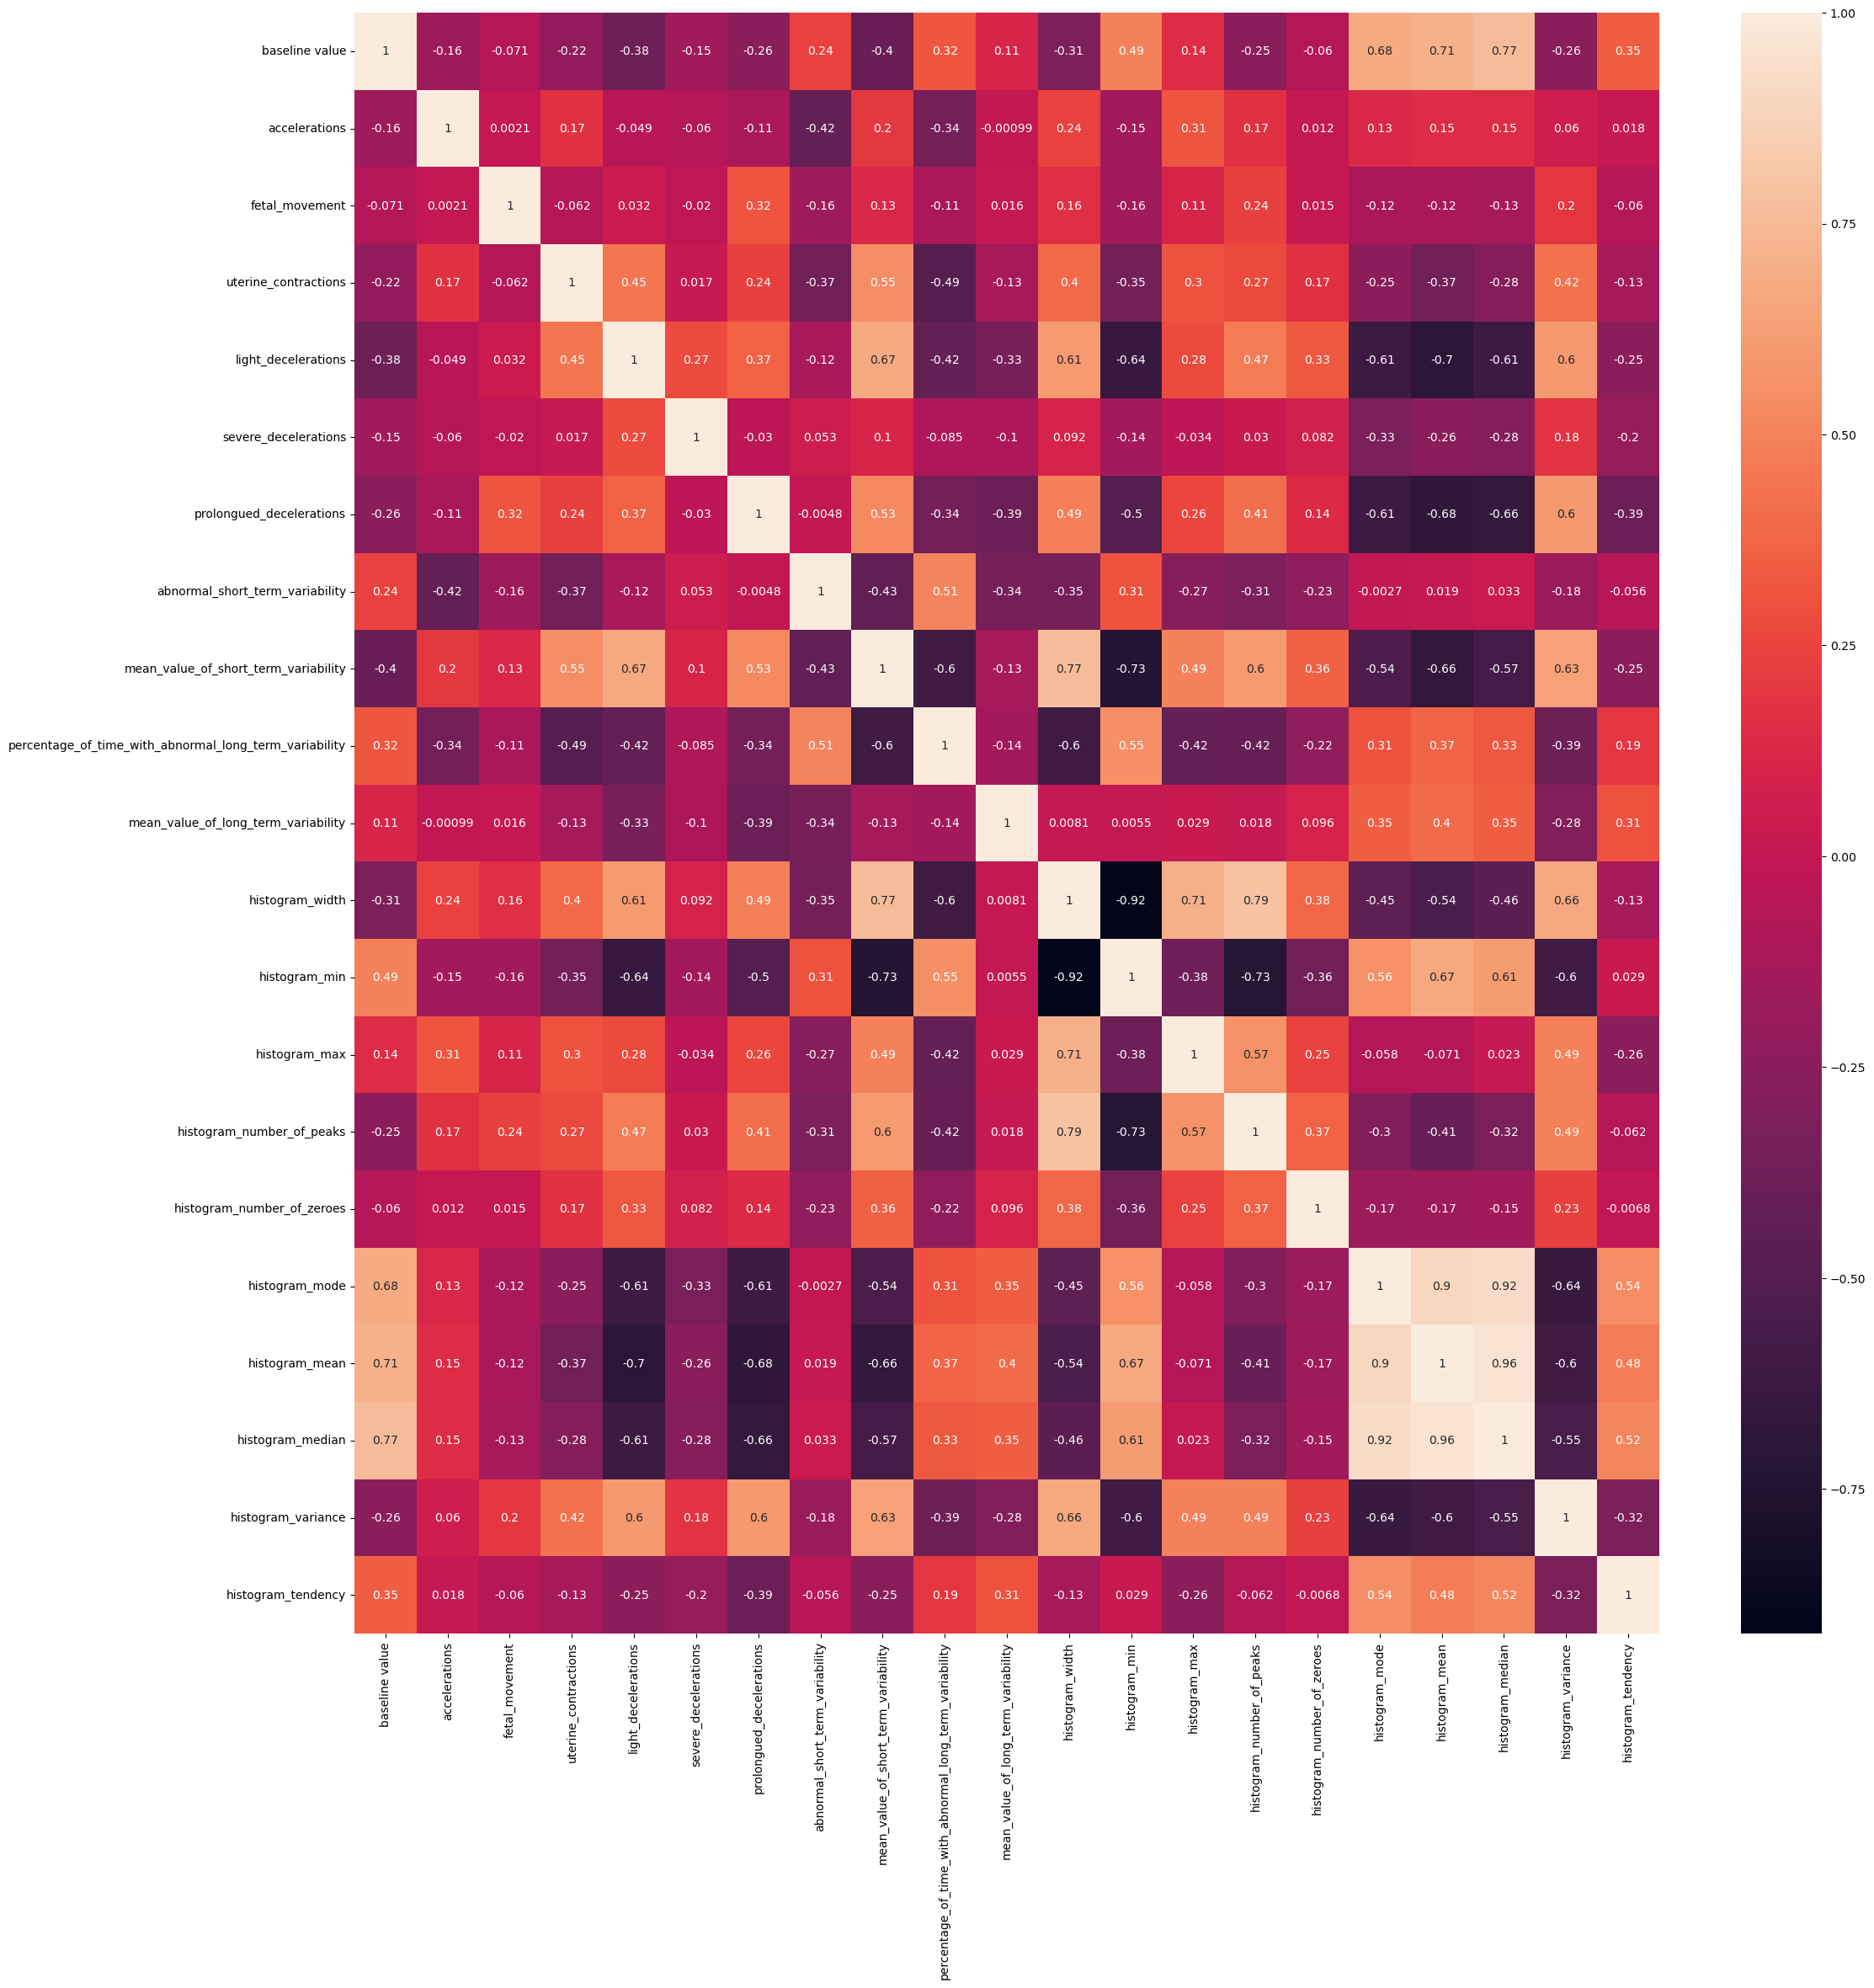

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(xdata.corr(), annot=True)

We'll drop the features that are below absolute 70% correlation 

In [14]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(xdata, 0.7)
len(set(corr_features))
xdata= xdata.drop(corr_features, axis=1)

In [16]:
xdata.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_max', 'histogram_number_of_zeroes', 'histogram_variance',
       'histogram_tendency'],
      dtype='object')

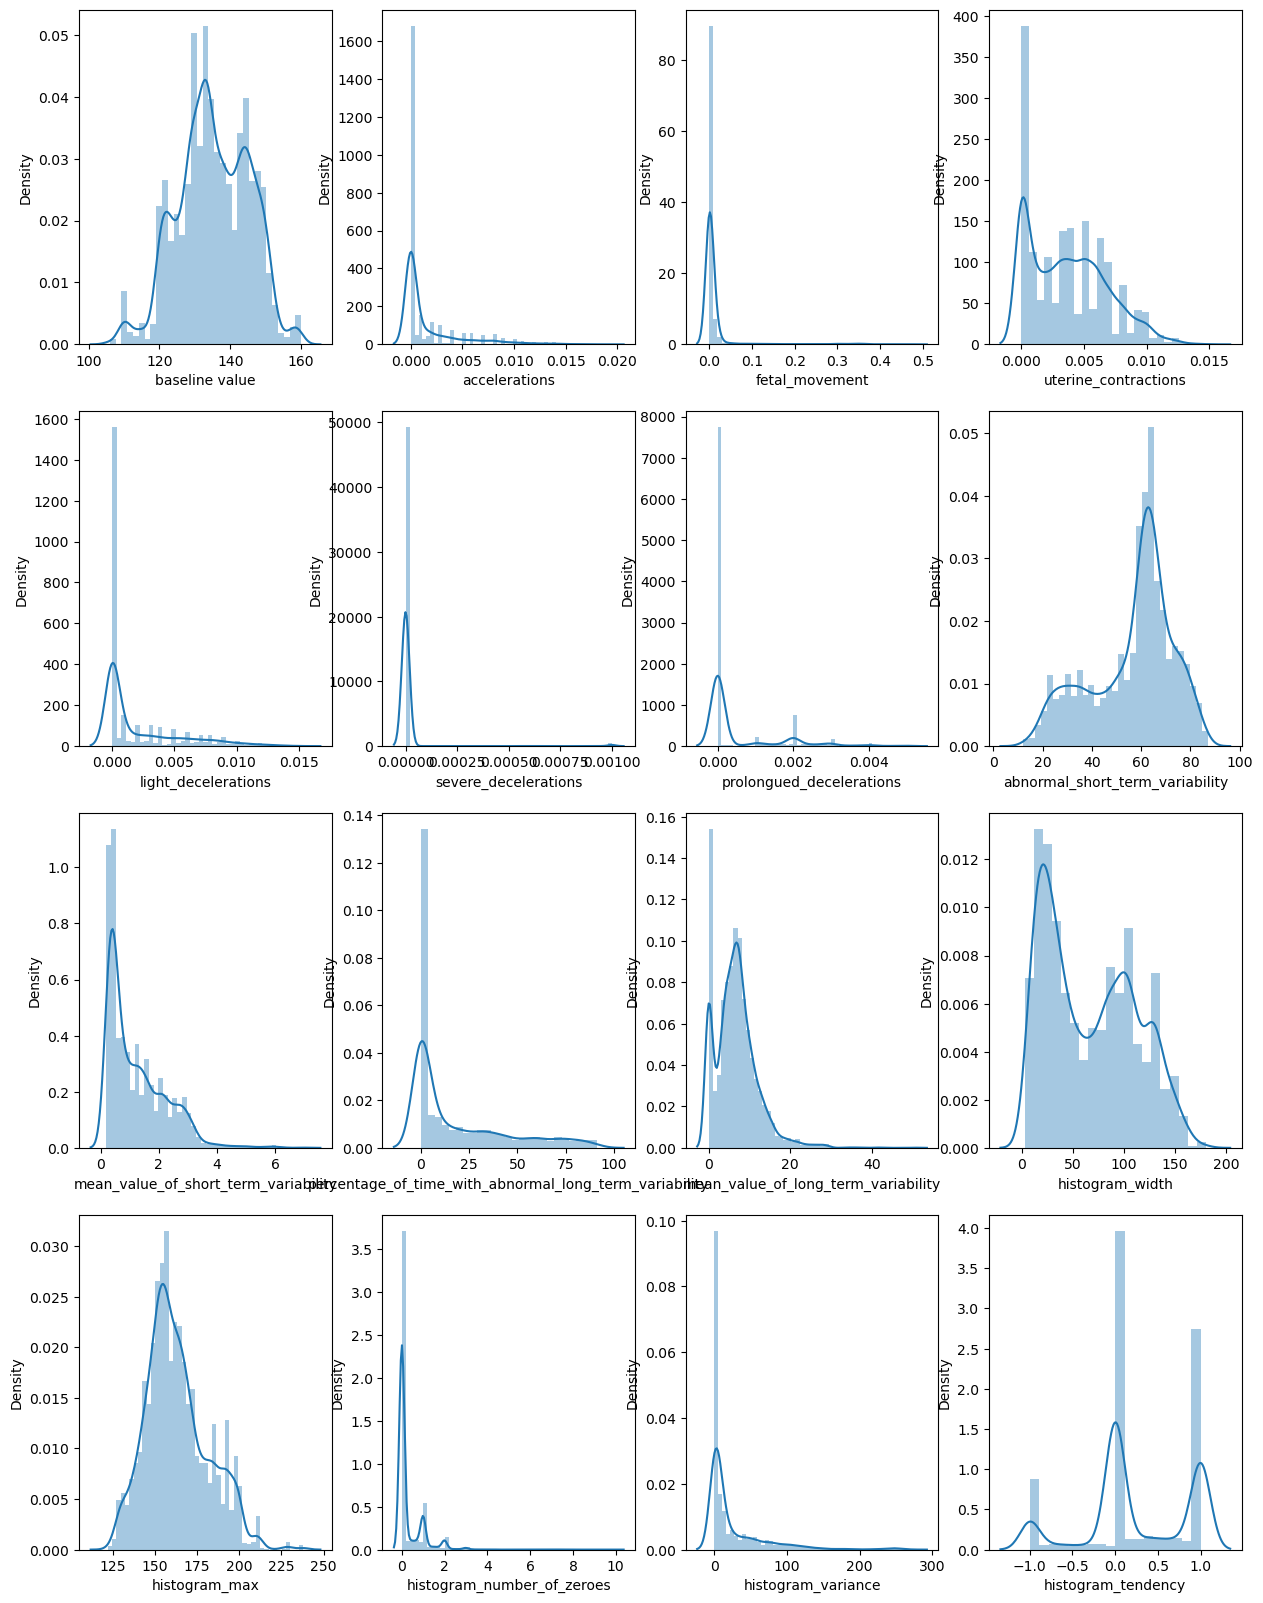

In [17]:
plt.figure(figsize=(15, 20))

subplot(4,4,1)
ax = sns.distplot(xdata['baseline value'])

subplot(4,4,2)
ax = sns.distplot(xdata['accelerations'])

subplot(4,4,3)
ax = sns.distplot(xdata['fetal_movement'])

subplot(4,4,4)
ax = sns.distplot(xdata['uterine_contractions'])

subplot(4,4,5)
ax = sns.distplot(xdata['light_decelerations'])

subplot(4,4,6)
ax = sns.distplot(xdata['severe_decelerations'])

subplot(4,4,7)
ax = sns.distplot(xdata['prolongued_decelerations'])

subplot(4,4,8)
ax = sns.distplot(xdata['abnormal_short_term_variability'])

subplot(4,4,9)
ax = sns.distplot(xdata['mean_value_of_short_term_variability'])

subplot(4,4,10)
ax = sns.distplot(xdata['percentage_of_time_with_abnormal_long_term_variability'])

subplot(4,4,11)
ax = sns.distplot(xdata['mean_value_of_long_term_variability'])

subplot(4,4,12)
ax = sns.distplot(xdata['histogram_width'])

subplot(4,4,13)
ax = sns.distplot(xdata['histogram_max'])

subplot(4,4,14)
ax = sns.distplot(xdata['histogram_number_of_zeroes'])

subplot(4,4,15)
ax = sns.distplot(xdata['histogram_variance'])

subplot(4,4,16)
ax = sns.distplot(xdata['histogram_tendency'])

plt.show()

As the distribution of data is not entirely normal thus we will use min max scaler

In [18]:
mc = MinMaxScaler()
xdata = mc.fit_transform(xdata)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.25, random_state=0)

# Training Models

Naive Bayes

In [20]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred_nb = nb.predict(xtest)

In [21]:
accuracy_nb = accuracy_score(ytest, ypred_nb)
precision_nb = precision_score(ytest, ypred_nb, average='weighted')
recall_nb = recall_score(ytest, ypred_nb, average='weighted')
f1_nb = f1_score(ytest, ypred_nb, average='weighted')
cm_nb = confusion_matrix(ytest, ypred_nb)

In [22]:
trac = nb.score(xtrain, ytrain)
print("Training Accuracy:", trac)
print("Testing Accuracy:", accuracy_nb)

Training Accuracy: 0.7381532629298673
Testing Accuracy: 0.7367993501218522


Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)

In [24]:
accuracy_lr = accuracy_score(ytest, ypred_lr)
precision_lr = precision_score(ytest, ypred_lr, average='weighted')
recall_lr = recall_score(ytest, ypred_lr, average='weighted')
f1_lr = f1_score(ytest, ypred_lr, average='weighted')
cm_lr = confusion_matrix(ytest, ypred_lr)

In [25]:
trac = lr.score(xtrain, ytrain)
print("Training Accuracy:", trac)
print("Testing Accuracy:", accuracy_lr)

Training Accuracy: 0.8667749796913079
Testing Accuracy: 0.8562144597887896


Decision Tree

In [26]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred_dt = dt.predict(xtest)

In [27]:
accuracy_dt = accuracy_score(ytest, ypred_dt)
precision_dt = precision_score(ytest, ypred_dt, average='weighted')
recall_dt = recall_score(ytest, ypred_dt, average='weighted')
f1_dt = f1_score(ytest, ypred_dt, average='weighted')
cm_dt = confusion_matrix(ytest, ypred_dt)

In [28]:
trac = dt.score(xtrain, ytrain)
print("Training Accuracy:", trac)
print("Testing Accuracy:", accuracy_dt)

Training Accuracy: 0.999458434876794
Testing Accuracy: 0.942323314378554


Random Forest

In [29]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
ypred_rf = rf.predict(xtest)

In [30]:
accuracy_rf = accuracy_score(ytest, ypred_rf)
precision_rf = precision_score(ytest, ypred_rf, average='weighted')
recall_rf = recall_score(ytest, ypred_rf, average='weighted')
f1_rf = f1_score(ytest, ypred_rf, average='weighted')
cm_rf = confusion_matrix(ytest, ypred_rf)

In [31]:
trac = rf.score(xtrain, ytrain)
print("Training Accuracy:", trac)
print("Testing Accuracy:", accuracy_rf)

Training Accuracy: 0.999458434876794
Testing Accuracy: 0.9780666125101544


K-Nearest Neighbours

In [32]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred_knn = knn.predict(xtest)

In [33]:
accuracy_knn = accuracy_score(ytest, ypred_knn)
precision_knn = precision_score(ytest, ypred_knn, average='weighted')
recall_knn = recall_score(ytest, ypred_knn, average='weighted')
f1_knn = f1_score(ytest, ypred_knn, average='weighted')
cm_knn = confusion_matrix(ytest, ypred_knn)

In [34]:
trac = knn.score(xtrain, ytrain)
print("Training Accuracy:", trac)
print("Testing Accuracy:", accuracy_knn)

Training Accuracy: 0.966693744922827
Testing Accuracy: 0.9406986190089358


Support Vector Machines 

In [35]:
svm = SVC()
svm.fit(xtrain, ytrain)
ypred_svm = svm.predict(xtest)

In [36]:
accuracy_svm = accuracy_score(ytest, ypred_svm)
precision_svm = precision_score(ytest, ypred_svm, average='weighted')
recall_svm = recall_score(ytest, ypred_svm, average='weighted')
f1_svm = f1_score(ytest, ypred_svm, average='weighted')
cm_svm = confusion_matrix(ytest, ypred_svm)

In [37]:
trac = svm.score(xtrain, ytrain)
print("Training Accuracy:", trac)
print("Testing Accuracy:", accuracy_svm)

Training Accuracy: 0.925534795559166
Testing Accuracy: 0.9114541023558083


Gradient Boosting Classifier

In [38]:
gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)
ypred_gb = gb.predict(xtest)

In [39]:
accuracy_gb = accuracy_score(ytest, ypred_gb)
precision_gb = precision_score(ytest, ypred_gb, average='weighted')
recall_gb = recall_score(ytest, ypred_gb, average='weighted')
f1_gb = f1_score(ytest, ypred_gb, average='weighted')
cm_gb = confusion_matrix(ytest, ypred_gb)

In [40]:
trac = gb.score(xtrain, ytrain)
print("Training Accuracy:", trac)
print("Testing Accuracy:", accuracy_gb)

Training Accuracy: 0.9875440021662605
Testing Accuracy: 0.9610073111291633


# Evaluation

In [41]:
models = ["Naive Bayes","Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVM", "Gradient Boosting"]
accuracy = [accuracy_nb, accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_gb]
precision = [precision_nb, precision_lr, precision_dt, precision_rf, precision_knn, precision_svm, precision_gb]
recall = [recall_nb, recall_lr, recall_dt, recall_rf, recall_knn, recall_svm, recall_gb]
f1_score = [f1_nb, f1_lr, f1_dt, f1_rf, f1_knn, f1_svm, f1_gb]

In [42]:
eval_table = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1_Score": f1_score
})
eval_table.round(3)

,Model,Accuracy,Precision,Recall,F1_Score
0,Naive Bayes,0.737,0.820,0.737,0.741
1,Logistic Regression,0.856,0.865,0.856,0.858
2,Decision Tree,0.942,0.942,0.942,0.942
3,Random Forest,0.978,0.978,0.978,0.978
4,KNN,0.941,0.945,0.941,0.941
5,SVM,0.911,0.919,0.911,0.913
6,Gradient Boosting,0.961,0.961,0.961,0.961


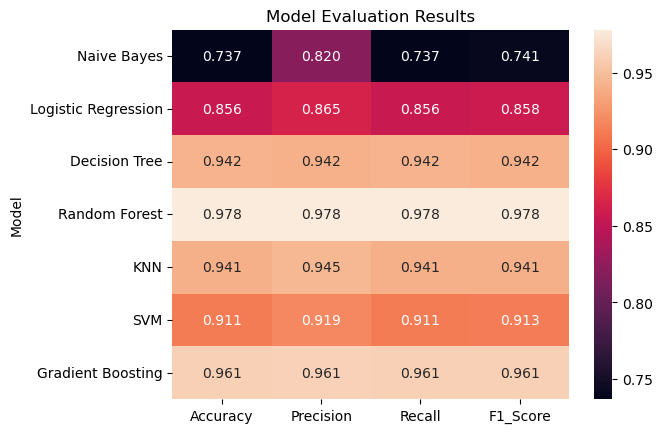

In [43]:
sns.heatmap(data=eval_table.set_index('Model').iloc[:, :], annot=True, fmt=".3f")
plt.title("Model Evaluation Results")
plt.show()

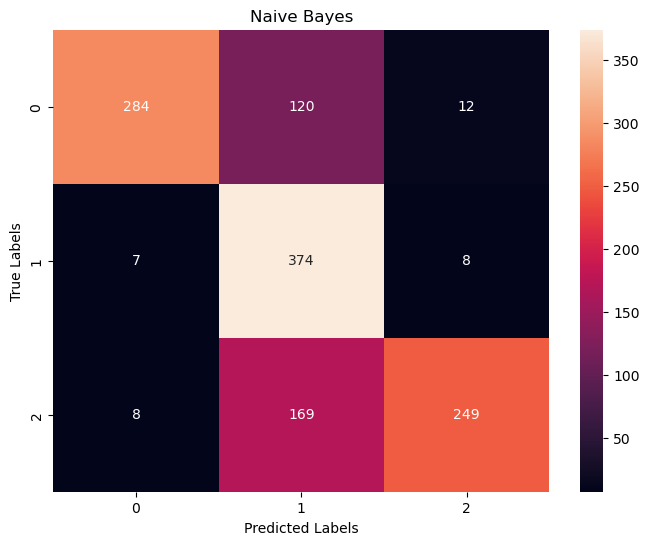

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes')
plt.show()

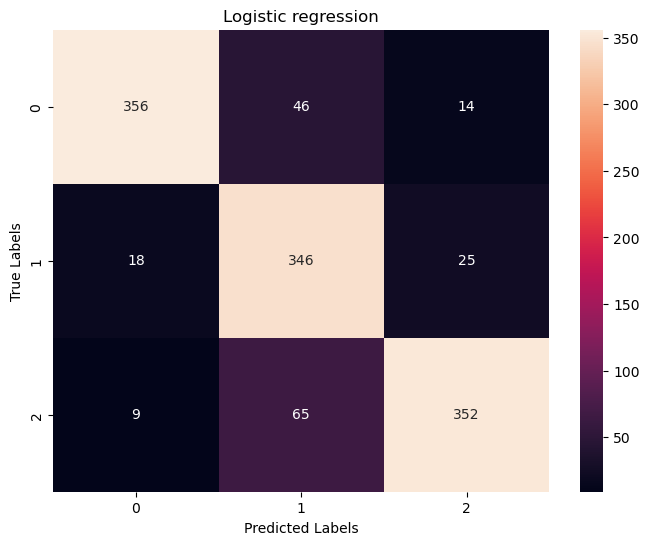

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic regression')
plt.show()

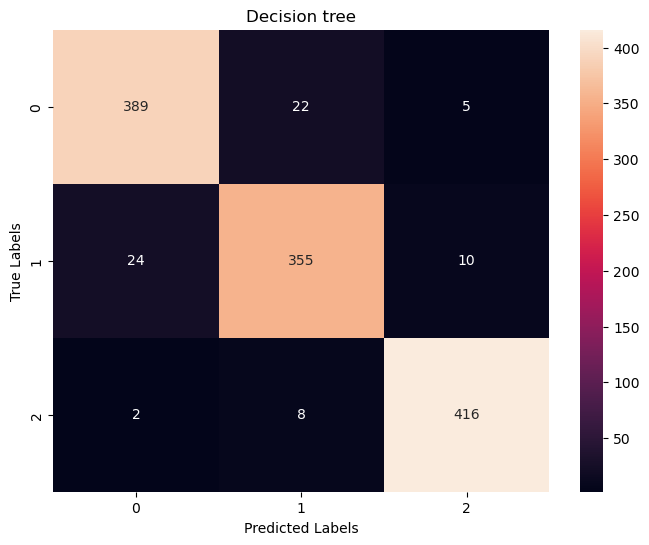

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision tree')
plt.show()

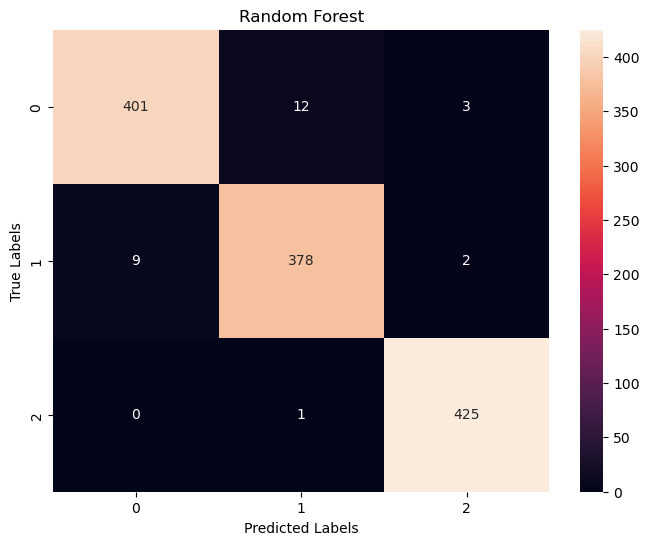

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest')
plt.show()

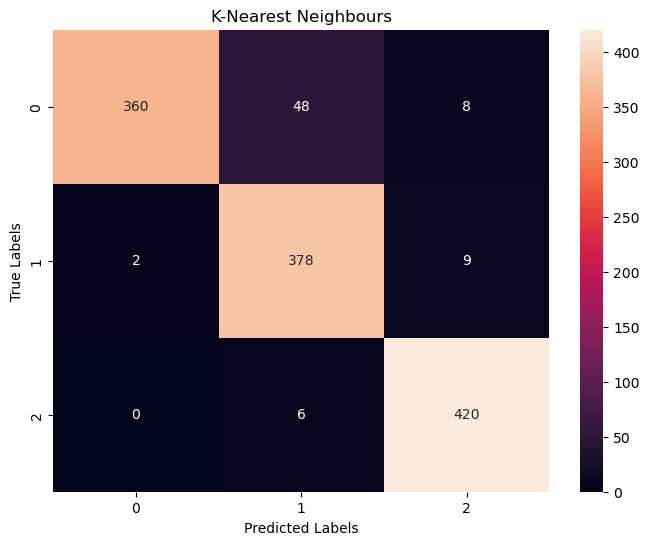

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('K-Nearest Neighbours')
plt.show()

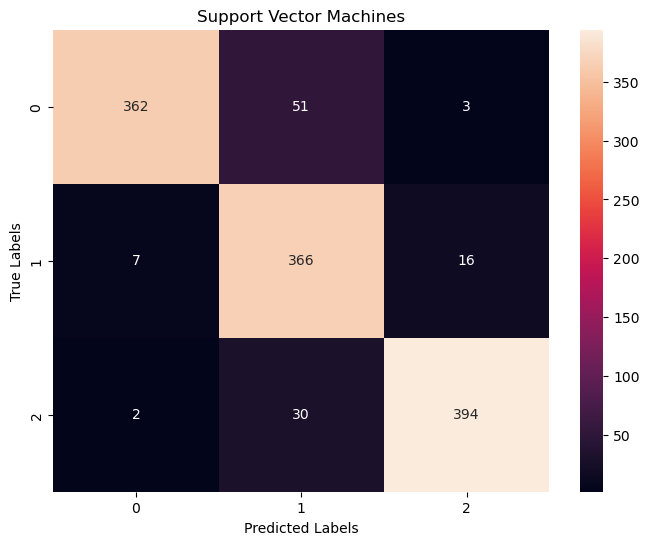

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Support Vector Machines')
plt.show()

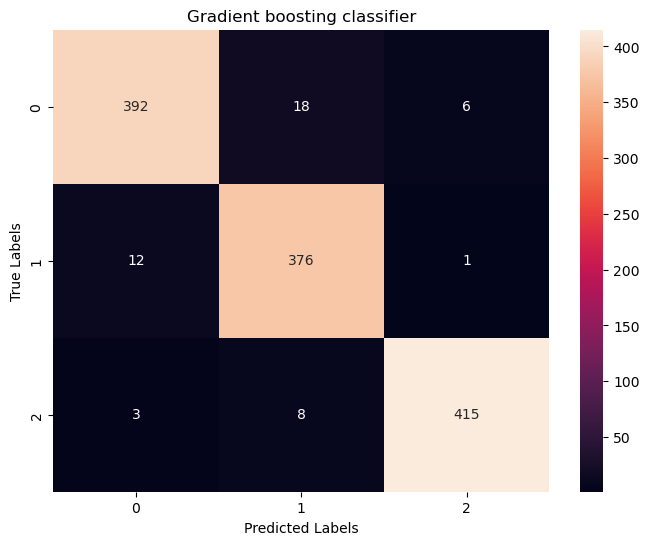

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient boosting classifier')
plt.show()

# Models Conclusion

Random Forest Performed well among all the other models

In [51]:
trac = rf.score(xtrain, ytrain)
print("Training Accuracy:", trac)

Training Accuracy: 0.999458434876794


In [52]:
print("Testing Accuracy:", accuracy_rf)

Testing Accuracy: 0.9780666125101544


# Applying Hyperparameter Tuning To improve accuracy

In [53]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['auto', 'sqrt', 'log2', 0.5],
    'bootstrap': [True, False],
}

In [54]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)

In [55]:
grid_search_rf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2', 0.5],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [56]:
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
best_params_rf

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [57]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestClassifier(bootstrap=False, n_estimators=300)

# Making the model using Best Grid Parameters

In [58]:
best_rf.fit(xtrain, ytrain)
ypred = best_rf.predict(xtest)

Training Accuracy

In [59]:
best_rf.score(xtrain,ytrain)

0.999458434876794

Testing Accuracy

In [60]:
accuracy_score(ytest, ypred)

0.9829406986190089

# Conclusion

Random Forest is performing with the accuracy of 98.29% thus is the ideal model to classify Fetal Health